# GRIP: The Spark Fondation

# Data Science Business Analytics Intern


# Author: KRISHNA MOHAN PAINULI

# Task1: Predict the percentage of an student based on the no. of study                        hours

**Importing all required libraries**

In [4]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Reading data from link

In [34]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [35]:
data.head(30)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Shape of the Dataset

In [36]:
data.shape

(25, 2)

# Check the info of data

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [38]:
data.sum()

Hours      125.3
Scores    1287.0
dtype: float64

In [39]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

# Check the Description of Student_score data:-

In [40]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization:-

**Now Let's plot a graph of our data so it will give us clear idea about data.**

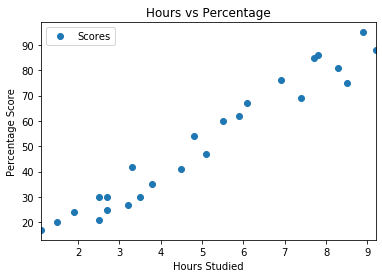

In [41]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**


### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Linear Regression Model

**Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [42]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

**Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:**

In [43]:
#import Library
from sklearn.model_selection import train_test_split  

**Split it into test data:-**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

# Train The Model

In [45]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 
y_predict = lr.predict(X_train)


### **Training the Algorithm**
**We have done to spliting our data into training and testing sets,and now is time to train our algorithm.**

In [46]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("Training Complete.")

Training Complete.


**Plotting the regression line.**

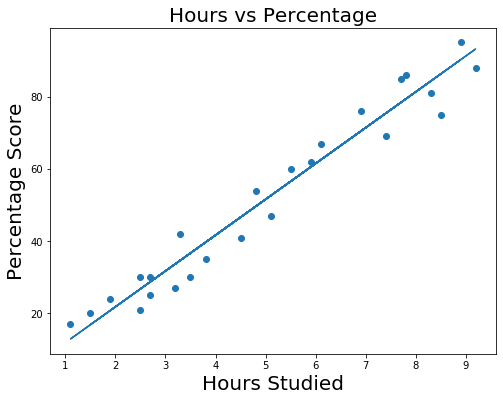

In [47]:
line = regressor.coef_*X+regressor.intercept_
plt.figure(figsize = (8,6))
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage',fontsize=20)  
plt.xlabel('Hours Studied',fontsize = 20)  
plt.ylabel('Percentage Score',fontsize = 20)  
plt.show()
plt.show()

# Checking the accuracy scores for training and test data

In [48]:
print("Test Scores:==" ,regressor.score(X_test,y_test))
print("Training Score:==",regressor.score(X_train,y_train))

Test Scores:== 0.9454906892105356
Training Score:== 0.9515510725211553


In [49]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [50]:
y_predict

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [52]:
y_predict[:5]

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217])

In [58]:
data = pd.DataFrame({'Actual':y_test,'predicted':y_predict[:5]})
data

,Actual,predicted
0,20,39.678655
1,27,20.848407
2,69,79.321281
3,30,70.401690
4,62,12.919882


In [64]:
#Let's predict the score for 9.25 hours
print("score student who studied for 9.25 hours a data",regressor.predict([[9.25]]))
#Let us do more...

print("\nScore of student who srudied for.........\n")
print("5.78 hours a day is:- ",regressor.predict([[5.78]]))
print("3 hours a day is:- ", regressor.predict([[3]]))
print("4 hours a day is:- ", regressor.predict([[4]]))
print("5 hours a day is:- ", regressor.predict([[5]]))
print("6 hours a day is:- ", regressor.predict([[6]]))

score student who studied for 9.25 hours a data [93.69173249]

Score of student who srudied for.........

5.78 hours a day is:-  [59.3017545]
3 hours a day is:-  [31.75012948]
4 hours a day is:-  [41.66078596]
5 hours a day is:-  [51.57144244]
6 hours a day is:-  [61.48209893]


# Model Evaluation Metrics

**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.**

In [69]:
from sklearn import metrics  
from sklearn.metrics import mean_squared_error , mean_absolute_error


In [66]:
#Checking the efficency model:

In [71]:
mean_squ_error = mean_squared_error(y_test,y_predict[:5])
means_abs_error = mean_absolute_error(y_test,y_predict[:5])

print("Mean Squard Error: ", mean_squ_error)
print("mean Absolute Error: ", means_abs_error)

Mean Squard Error:  914.5549752244242
mean Absolute Error:  25.126667098277874


#                 ".......Thank You !........."
